In [15]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from datetime import date
import sys
from matplotlib.animation import FuncAnimation
import gc

from Ps_library import *
from Hamiltonian_library import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':25})
rc('text', usetex=True)

# First simulate with a single pulse to find laser parameters for full population transfer

In [29]:
system = Ps_system(N_atoms=250)
rabi0 = 2*np.pi*(3000e-3)
chirp = 2*np.pi*(4000e-3)
detuning = 0
direction = 1

num_pulses = 1

flip_pulse = {"order":0,"rabi0" : rabi0, "detuning": detuning,"chirp" : chirp,"pulse_duration" : 1,"unit_wavevector":direction,"start":0,"end":3,"notch":0}
flip_pulse["label"] = "laser_5ps_0"
system.init_pulse(flip_pulse)
     
    
system.init_pulse_cycle()
system.init_distribution_constant()
system.init_states_desymmetrized()

system.evolve()



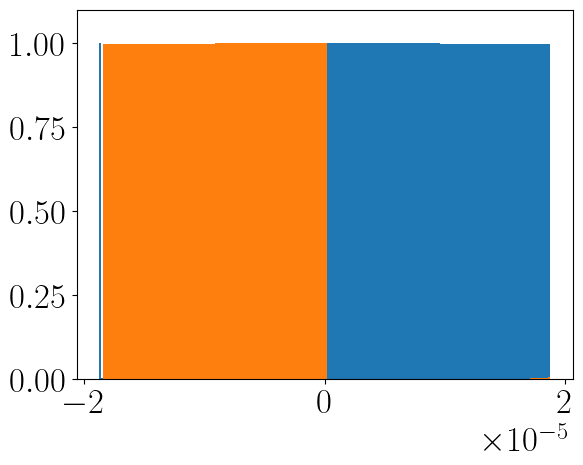

In [37]:
#plt.hist(system.velocity_bins,system.velocity_bins,weights = system.expect["1S"][0]+system.expect["2P"][0])
plt.hist(system.velocity_bins,system.velocity_bins,weights = system.expect["1S"][1])
plt.hist(system.velocity_bins,system.velocity_bins,weights = system.expect["2P"][1])
plt.ylim(0,1.1)
plt.show()

In [6]:
system = Ps_system(N_atoms=250)
rabi0 = 2*np.pi*(3000e-3)
chirp = 2*np.pi*(4000e-3)
detuning = 0
start_direction = 1

num_pulses = 50

# flip_pulse = {"rabi0" : rabi0, "detuning": detuning,"chirp" : chirp,"pulse_duration" : 5,"unit_wavevector":direction,"start":0,"end":15,"notch":0}
# flip_pulse["label"] = "laser"+str(1)
# system.init_pulse(flip_pulse)
for i in range(num_pulses):
    direction = (-1)**i*start_direction # the exponentiation is in case of crash, then direction is preserved after restarting ....
    flip_pulse = {"order":i,"rabi0" : rabi0, "detuning": detuning,"chirp" : chirp,"pulse_duration" : 1,"unit_wavevector":direction,"start":0,"end":3,"notch":0}
    flip_pulse["label"] = "laser_5ps_"+str(i)
    system.init_pulse(flip_pulse)
     
    
system.init_pulse_cycle()
system.init_distribution_constant()
system.init_states_desymmetrized()

system.evolve()
#system.states = qt.qload("data/states_flattop/laser_5ps_48.csv")
#save_path = "data/states_flattop/"
#system.evolve_memory_friendly(save_path)

10.8%. Run time:   3.67s. Est. time left: 00:00:00:30
21.6%. Run time:   7.10s. Est. time left: 00:00:00:25
32.4%. Run time:   9.81s. Est. time left: 00:00:00:20
40.5%. Run time:  11.45s. Est. time left: 00:00:00:16
51.4%. Run time:  13.58s. Est. time left: 00:00:00:12
62.2%. Run time:  16.05s. Est. time left: 00:00:00:09
70.3%. Run time:  17.44s. Est. time left: 00:00:00:07
81.1%. Run time:  19.96s. Est. time left: 00:00:00:04
91.9%. Run time:  22.74s. Est. time left: 00:00:00:02
Total run time:  25.43s
10.8%. Run time:   4.61s. Est. time left: 00:00:00:38
21.6%. Run time:   7.64s. Est. time left: 00:00:00:27
32.4%. Run time:  10.65s. Est. time left: 00:00:00:22
40.5%. Run time:  13.13s. Est. time left: 00:00:00:19
51.4%. Run time:  14.87s. Est. time left: 00:00:00:14
62.2%. Run time:  17.88s. Est. time left: 00:00:00:10
70.3%. Run time:  19.58s. Est. time left: 00:00:00:08
81.1%. Run time:  22.33s. Est. time left: 00:00:00:05
91.9%. Run time:  25.36s. Est. time left: 00:00:00:02
Tota

: 

: 

In [ ]:
data_handler = handler()
#data_handler.save_states_csv(system,"data/states_flattop/flattop.csv")

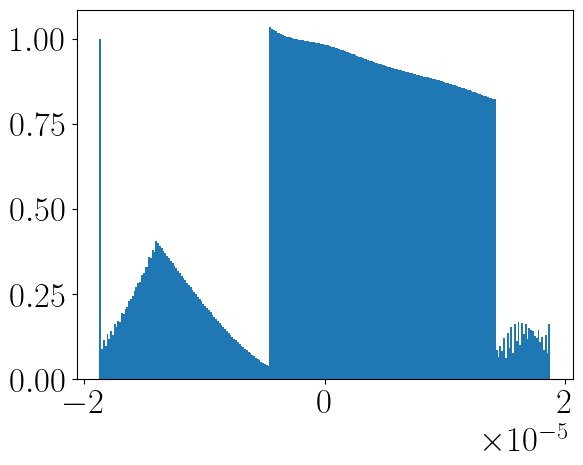

In [26]:
system = Ps_system()
data_handler = handler()
fig,ax = plt.subplots()
system.create_velocity_space()
system.create_internal_state_space()
state = data_handler.load_states_csv("data/states_flattop/laser_5ps_"+str(30)+".csv")
expect = system.interpret_state(state)
ax.hist(system.velocity_bins,system.velocity_bins,weights = expect["1S"])
plt.show()
#plt.legend()

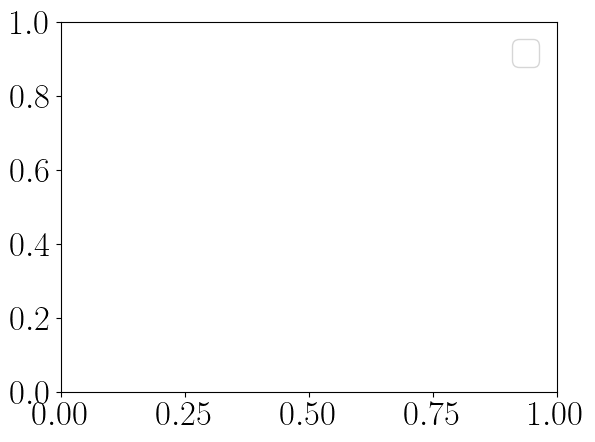

In [2]:
system = Ps_system()
data_handler = handler()
fig,ax = plt.subplots()
ax.hist(system.velocity_bins,system.velocity_bins,weights = system.expect["1S"][0],color="black")
ax.hist(system.velocity_bins,system.velocity_bins,weights = system.expect["2P"][0],color="black")
state = data_handler.load_states_csv("data/states_flattop/laser_5ps_"+str(65)+".csv")
for key in system.expect:
    ax.hist(system.velocity_bins,system.velocity_bins,weights = state,alpha=0.8,label=key)
plt.legend()

In [ ]:
num_pulses = 76
data_handler = handler()

std = []
for i in range(num_pulses):
    state = data_handler.load_states_csv("data/states_flattop/laser_5ps_"+str(i)+".csv")
    std.append(data_handler.expect_standard_deviation(state))
    


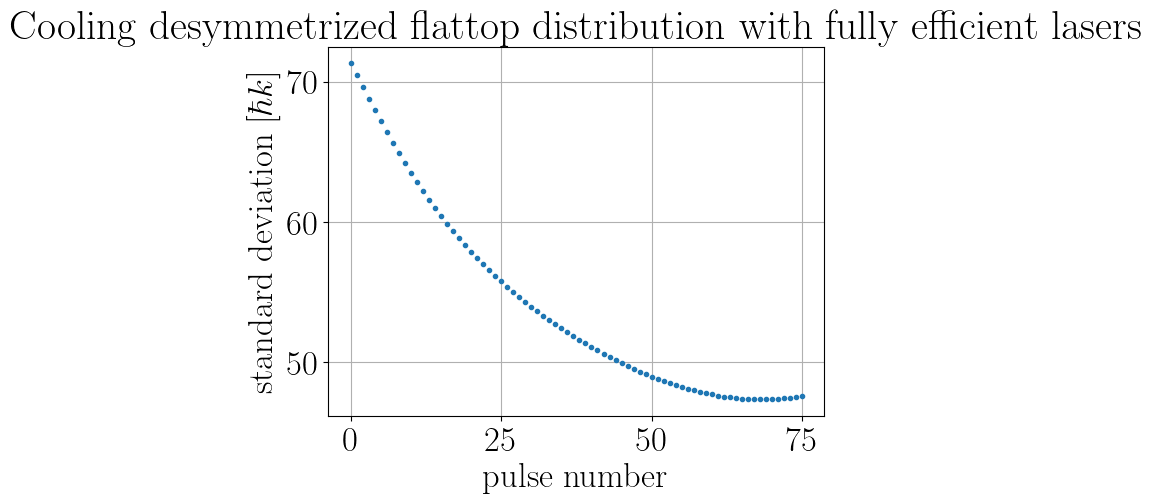

In [10]:
plt.plot(np.arange(num_pulses),std,'.')
plt.xlabel("pulse number")
plt.ylabel(r"standard deviation [$\hbar k$]")
#plt.xlim(0,5)
#plt.ylim(65,72)
plt.title("Cooling desymmetrized flattop distribution with fully efficient lasers")
plt.grid()
#plt.savefig("figures/jan_2023/cooling_flattop.jpg",bbox_inches="tight")
plt.show()

It is clear from these simulations that the cooling in this case is extremely sensitive to population transfer. The highest velocity states are not fully transferred (something like 99% transferred), resulting in inefficient cooling. Let us try again and just pump up the laser parameters to get even better transfer ....

In [38]:
system = Ps_system(N_atoms=250)
rabi0 = 2*np.pi*(5000e-3)
chirp = 2*np.pi*(5000e-3)
detuning = 0
direction = 1

num_pulses = 1

flip_pulse = {"order":0,"rabi0" : rabi0, "detuning": detuning,"chirp" : chirp,"pulse_duration" : 1,"unit_wavevector":direction,"start":0,"end":3,"notch":0}
flip_pulse["label"] = "laser_5ps_0"
system.init_pulse(flip_pulse)
     
    
system.init_pulse_cycle()
system.init_distribution_constant()
system.init_states_desymmetrized()

system.evolve()

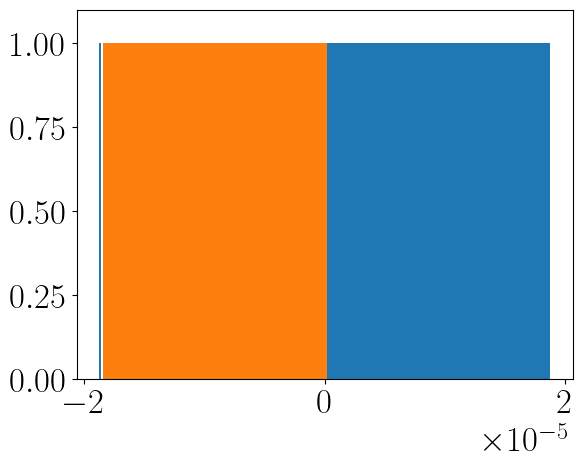

In [42]:
#plt.hist(system.velocity_bins,system.velocity_bins,weights = system.expect["1S"][0]+system.expect["2P"][0])
plt.hist(system.velocity_bins,system.velocity_bins,weights = system.expect["1S"][1])
plt.hist(system.velocity_bins,system.velocity_bins,weights = system.expect["2P"][1])
plt.ylim(0,1.1)
plt.show()

Not only do we use a higher-energy pulse with more chirp, we also decrease the velocity range of our distribution because the issues lie in the edges anyway.

In [123]:

system = Ps_system(N_atoms=250,N_bins=101)
rabi0 = 2*np.pi*(5000e-3)
chirp = 2*np.pi*(5000e-3)
detuning = 0
start_direction = 1

num_pulses = 30

# flip_pulse = {"rabi0" : rabi0, "detuning": detuning,"chirp" : chirp,"pulse_duration" : 5,"unit_wavevector":direction,"start":0,"end":15,"notch":0}
# flip_pulse["label"] = "laser"+str(1)
# system.init_pulse(flip_pulse)
for i in range(num_pulses):
    direction = (-1)**i*start_direction # the exponentiation is in case of crash, then direction is preserved after restarting ....
    flip_pulse = {"order":i,"rabi0" : rabi0, "detuning": detuning,"chirp" : chirp,"pulse_duration" : 1,"unit_wavevector":direction,"start":0,"end":3,"notch":0}
    flip_pulse["label"] = "laser_5ps_"+str(i)
    system.init_pulse(flip_pulse)
     
    
system.init_pulse_cycle()
system.init_distribution_constant()
system.init_states_desymmetrized()

system.evolve()
#system.states = qt.qload("data/states_flattop/laser_5ps_48.csv")
#save_path = "data/states_flattop/flattop_101Bins/"
#system.evolve_memory_friendly(save_path)

Simulating pulse number 0 ....
Done!
Simulating pulse number 1 ....
Done!
Simulating pulse number 2 ....
Done!
Simulating pulse number 3 ....
Done!
Simulating pulse number 4 ....
Done!
Simulating pulse number 5 ....
Done!
Simulating pulse number 6 ....
Done!
Simulating pulse number 7 ....
Done!
Simulating pulse number 8 ....
Done!
Simulating pulse number 9 ....
Done!
Simulating pulse number 10 ....
Done!
Simulating pulse number 11 ....
Done!
Simulating pulse number 12 ....
Done!
Simulating pulse number 13 ....
Done!
Simulating pulse number 14 ....
Done!
Simulating pulse number 15 ....
Done!
Simulating pulse number 16 ....
Done!
Simulating pulse number 17 ....
Done!
Simulating pulse number 18 ....
Done!
Simulating pulse number 19 ....
Done!
Simulating pulse number 20 ....
Done!
Simulating pulse number 21 ....
Done!
Simulating pulse number 22 ....
Done!
Simulating pulse number 23 ....
Done!
Simulating pulse number 24 ....
Done!
Simulating pulse number 25 ....
Done!
Simulating pulse numbe

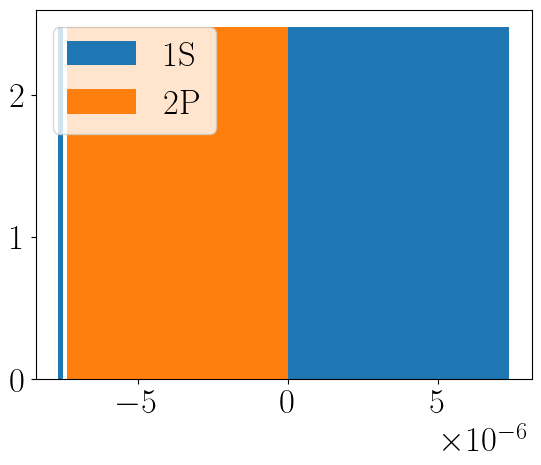

In [115]:
fig,ax = plt.subplots()
for key in system.expect:   
    ax.hist(system.velocity_bins,system.velocity_bins,weights = system.expect[key][1], label=key)
plt.legend()

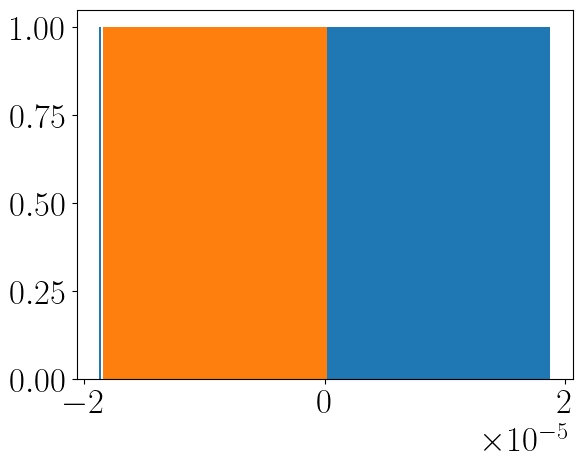

In [49]:
system2 = Ps_system()
data_handler2 = handler()
system2.create_velocity_space()
system2.create_internal_state_space()

state = data_handler2.load_states_csv("data/states_flattop/flattop_R5000E-3_C5000E-3/laser_5ps_"+str(0)+".csv")
expect = system2.interpret_state(state)

fig,ax = plt.subplots()
for key in expect:   
    ax.hist(system2.velocity_bins,system2.velocity_bins,weights = expect[key],label=key)
plt.show()

In [116]:
num_pulses = 30
data_handler = handler()

std = []
for i in range(num_pulses):
    state = data_handler.load_states_csv("data/states_flattop/flattop_101Bins/laser_5ps_"+str(i)+".csv")
    std.append(data_handler.expect_standard_deviation(state,system.N_bins))
    

15.223883266963021 28.31051985508368
1.0000000000000018


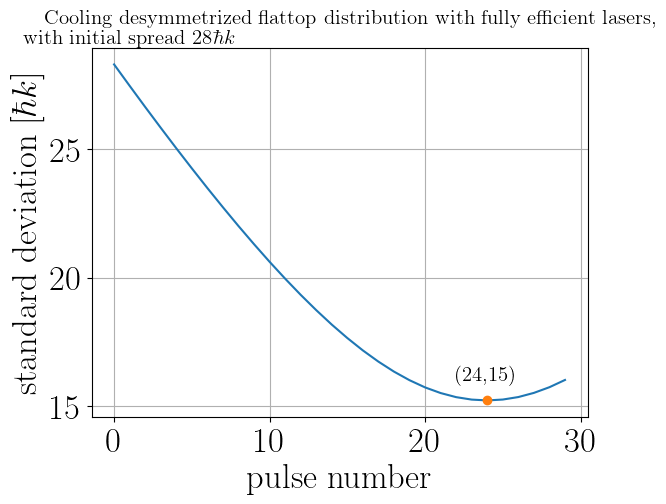

In [118]:
plt.plot(np.arange(num_pulses),std)
plt.xlabel("pulse number")
plt.ylabel(r"standard deviation [$\hbar k$]")

plt.title(r"Cooling desymmetrized flattop distribution with fully efficient lasers,\newline with initial spread {}$\hbar k$".format(int(std[0])),fontsize=15)
plt.grid()

plt.plot(np.argmin(std),np.min(std),'o')
plt.text(22,16,"({},{})".format(int(np.argmin(std)),int(np.min(std))),fontsize=15)
print(np.min(std),std[0])
#print(system.velocity_bins)
print((system.velocity_bins[-1]-system.velocity_bins[-2])/1.5e-7)
#print(system.initial_pop)
plt.savefig("figures/jan_2023/cooling_flattop_initial_28hbark.jpg",bbox_inches="tight")
plt.show()

In [114]:
a = np.arange(-9//2,9//2)
print(a.size)

9
